In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('data.csv')

In [2]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
non_numerical_columns=data.select_dtypes(include=['object']).columns

In [5]:
data1=data
for column in non_numerical_columns:
    data1[column + '_LabelEncoded']=label_encoder.fit_transform(data1[column])
    data1=data1.drop(column,axis=1)
print(data1)   

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Gender_LabelEncoded  
0                      1  
1                      1  
2                      0  
3                      0  
4                      0  
..                   

In [6]:
no_of_nul=list(data.isnull().sum())
print(no_of_nul)

[0, 0, 0, 0, 0, 0]


In [7]:
X = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [9]:
k=10
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data1)


KMeans(n_clusters=4)

In [10]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [11]:
df=pd.DataFrame(data1)

In [12]:
df['cluster']=kmeans.labels_

In [13]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_LabelEncoded,cluster
0,1,19,15,39,1,1
1,2,21,15,81,1,1
2,3,20,16,6,0,1
3,4,23,16,77,0,1
4,5,31,17,40,0,1


In [14]:
from sklearn.decomposition import PCA
pca=PCA(2)
pca_res=pca.fit_transform(data1)
df['X']=pca_res[:,0]
df['Y']=pca_res[:,1]
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_LabelEncoded,cluster,X,Y
0,1,19,15,39,1,1,-109.382965,5.493734
1,2,21,15,81,1,1,-108.202062,-34.913099
2,3,20,16,6,0,1,-107.375178,37.853028
3,4,23,16,77,0,1,-106.006997,-30.544745
4,5,31,17,40,0,1,-104.979360,7.310172


In [15]:
# cluster_0=df[df['cluster']==0]
# cluster_1=df[df['cluster']==1]
# cluster_2=df[df['cluster']==2]

# plt.scatter(cluster_0['X'], cluster_0['Y'], label='Cluster 0')
# plt.scatter(cluster_1['X'], cluster_2['Y'], label='Cluster 1')
# plt.scatter(cluster_2['X'], cluster_2['Y'], label='Cluster 2')
# plt.scatter(cluster_3['X'], cluster_3['Y'], label='Cluster 3')

# plt.legend()
# plt.title('K-MEANS VISUALIZATION')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

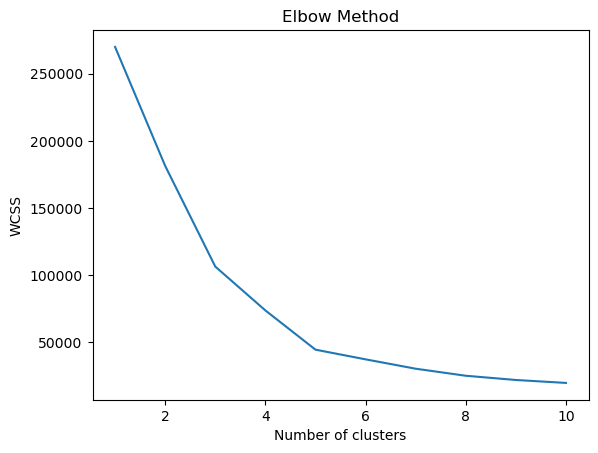

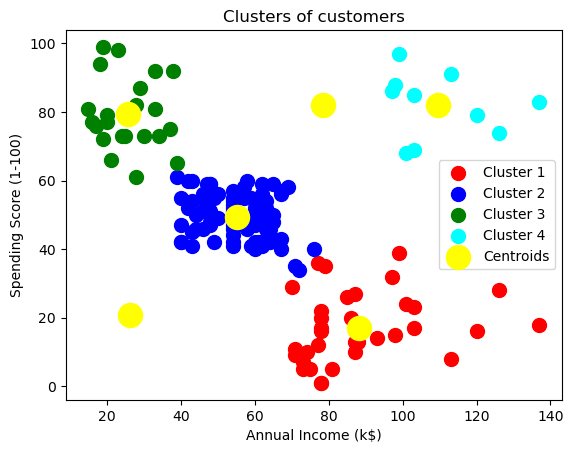

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv")

# Selecting features for clustering
X = data.iloc[:, [3, 4]].values  # Using Annual Income and Spending Score for clustering

# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Implementing from the scratch

In [17]:
class KMEANS:
    def __init__(self,data_n,n_clusters):
        self.data=data_n
        self.clusters=n_clusters
        
        

In [18]:
data2=data[['Annual Income (k$)','Spending Score (1-100)']]

In [19]:
z=KMeans(data[['Annual Income','Spending Score']],n_clusters=3)
z._run()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')